# Deep Learning (Fall 1401 - Dr. Beigy)

Name:Aref Shahbakhsh
</br>
Student Number:400211202

# 0. Pre

## Introduction
The purpose of this notebook is to teach you some essentials about the Pytorch library. We will also implement our own dataloader, model, and trainer, so that after we train the model, it can distinguish between different cloths! The good news is, if you do this notebook carefully and appropriately, you will have a nice snippet-base to use later on. So let's start `shift+Enter`ing :)

## Requirements

In [ ]:
!pip install -q numpy torch torchvision pillow tqdm

## Imports

In [ ]:
from copy import deepcopy
from math import ceil

import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from sklearn.metrics import accuracy_score
from torchvision.datasets import FashionMNIST
from tqdm.notebook import tqdm

# 1. Data

## Dataset and Dataloader

### Dataset
We will use Fashion-MNIST dataset for our experiments in this notebook. It is a small dataset, so you will not need a GPU for your training.

In [ ]:
# Making datasets
train_set = FashionMNIST(root='fashion-mnist', download=True, train=True)
test_set = FashionMNIST(root='fashion-mnist', download=True, train=False)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting fashion-mnist/FashionMNIST/raw/train-images-idx3-ubyte.gz to fashion-mnist/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting fashion-mnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz to fashion-mnist/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting fashion-mnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to fashion-mnist/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting fashion-mnist/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to fashion-mnist/FashionMNIST/raw



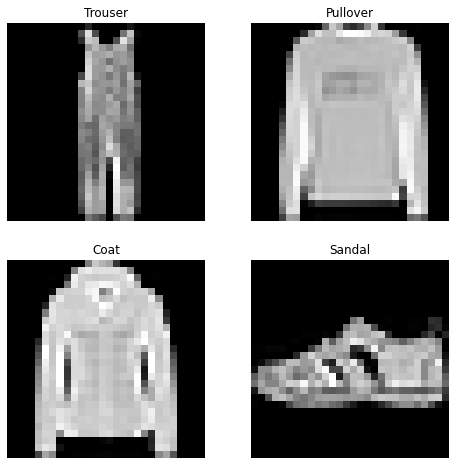

In [ ]:
# Testing samples
######################   TODO 1.1   #########################
# Write a function to plot 4 random images from the 
# training set with their respective labels
###################### (5 points) #########################
import matplotlib.pyplot as plt

def plot_random_image(train_set):
  labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
  figure = plt.figure(figsize=(8, 8))
  cols, rows = 2, 2
  for i in range(1, cols * rows + 1):
      sample_idx = torch.randint(len(train_set), size=(1,)).item()
      img, label = (train_set[sample_idx])
      transform = transforms.Compose([transforms.PILToTensor()])
      img = transform(img)
      figure.add_subplot(rows, cols, i)
      plt.title(labels_map[label])
      plt.axis("off")
      plt.imshow(img.squeeze(), cmap="gray")
  plt.show()


plot_random_image(train_set)

 

### Dataloader
Dataloader is an object that combines a dataset and a sampler, and provides an iterable over the given dataset. Pytorch has its own dataloader, but here, to understand what lies under the hood, we will implement our custom one.

In [ ]:
class CustomDataloader:
    def __init__(self, dataset, batch_size, shuffle=False):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle
        # images passed to the dataloader are PIL objests.
        # we need to convert those to tensors:
        self.transform = transforms.Compose([
            transforms.PILToTensor()
        ])
        
    def __len__(self):
        ######################   TODO 1.2   ########################
        # return the count of batches.
        
        return int(len(self.dataset)/self.batch_size)
        ###################### (1 points) #########################

    def __iter__(self, calm=True):
        indexes = list(range(len(self.dataset)))
        batch_imgs = []
        batch_imgs_transformed = torch.tensor([])
        batch_labels = []
        

        for idx in range(0, len(self.dataset), self.batch_size):
            ######################   TODO 1.3   ########################
            # construct a batch of images respective to the indexes:
            # 1. construct a list of images
            # 2. convert the list to tensors
            # 3. convert tensors to float32 (each tensor element should be between 0 and 1)
            # 4. construct the respective labels list
            batch_indexes = idx/self.batch_size
            #---------------------------------------------------
            
            for j in range(idx,idx+self.batch_size):
                batch_imgs.append(self.dataset[j][0])
                a = (self.transform(self.dataset[j][0]).to(torch.float32)/255)
                batch_imgs_transformed = torch.cat((batch_imgs_transformed,a))
                batch_labels.append(self.dataset[j][1])
           
              #------------------------------------------------------
              

           



            ###################### (8 points) #########################
            yield batch_imgs_transformed, torch.tensor(batch_labels)
            batch_imgs = []
            batch_imgs_transformed = torch.tensor([])
            batch_labels = []
        return


In [ ]:
def test_dataloader():
    ######################   TODO 1.3   ########################
    # test your dataloader!
    count = 0
    dataloader = CustomDataloader(dataset = train_set,batch_size=2)
    for data, labels in dataloader:
        print('number of images in every batch:'+str(dataloader.batch_size))
        print(data)
        print('number of labels in every batch:'+str(dataloader.batch_size))
        print(labels)
        count = count + 1 
        if count ==2: 
            break
        
        
       
        
    ###################### (5 points) #########################

test_dataloader()

number of images in every batch:2
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
number of labels in every batch:2
tensor([9, 0])
number of images in every batch:2
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0

In [ ]:
######################   TODO 1.4   #########################
# initialaze the dataloaders, for training_set and test_set
train_dataloader = CustomDataloader(dataset = train_set,batch_size=16)
test_dataloader = CustomDataloader(dataset = test_set,batch_size=16)
###################### (1 points) #########################

# 2. Model
Here, we will implement our network. Our model is a simple feed-forward network that gets an image, flattens the image, then passes it through several linear layers with relu activations.

In [ ]:
from numpy.core.fromnumeric import argmax
class Classifier(nn.Module):
    def __init__(self, input_dims, hidden_dims, num_classes):
        super().__init__()
        self.nn_layers = nn.ModuleList()
        self.activation = nn.ReLU()
        self.flatten = torch.flatten
        ######################   TODO 2.1   ########################
        # construct layers of the network
        # these layers are stored in `self.nn_layers`
        # use `nn.Linear` for all layers
        hidden_dims = hidden_dims
        # hidden layer

        
        self.nn_layers.append(nn.Linear(input_dims[0]*input_dims[1],hidden_dims[0]))
        self.nn_layers.append(self.activation)
        for i in range(len(hidden_dims)):
          if i==len(hidden_dims) - 1 :
            self.nn_layers.append(nn.Linear(hidden_dims[i],num_classes))
          else:
              
            self.nn_layers.append(nn.Linear(hidden_dims[i],hidden_dims[i+1]))
            self.nn_layers.append(self.activation)
         

        # use `self.nn_layers.append`
        ###################### (10 points) #########################
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
      
       

        x = self.flatten(x, start_dim=1)
        for i in range(len(self.nn_layers)):
          x = self.nn_layers[i](x)

        ######################   TODO 2.2   ########################
        # pass `x` through all the layers of the network.
        # also don't forget the activation functions!
        # don't use `softmax` in the last layer.
        ###################### (5 points) #########################
        return x

    def predict(self, x):
        ######################   TODO 2.3   ########################
        # get the predicted class of x.
        # use softmax and then get the maximum indexes
        x = self.forward(x)
        prediction = self.softmax(x)
        temp = []
        
        
        for i in range(len(prediction)):
            a = torch.argmax(prediction[i])
            
            
            temp.append(a)
        prediction = np.array(temp)

        ###################### (5 points) #########################
        return prediction


In [ ]:
def test_model():
    input_dims = (28, 28)
    hidden_dims = [10, 100, 20]
    num_classes = 10
    batch_size = 8
    
    cls = Classifier(input_dims, hidden_dims, num_classes)
    x = torch.rand(batch_size, *input_dims)
    assert cls(x).shape == torch.Size([batch_size, num_classes])
    assert cls.predict(x).shape == torch.Size([batch_size])


def test_model_with_dataloader():
    input_dims = (28, 28)
    hidden_dims = [10, 100, 20]
    num_classes = 10
    batch_size = 2
    dataloader = CustomDataloader(dataset=test_set, batch_size=batch_size, shuffle=True)
    imgs, labels = next(iter(dataloader))
    cls = Classifier(input_dims, hidden_dims, num_classes)
    assert cls(imgs).shape == torch.Size([batch_size, num_classes])
    assert cls.predict(imgs).shape == torch.Size([batch_size])

test_model()
test_model_with_dataloader()

# 3. Training

## Trainer
Trainer is an object that gets the model, dataloaders, optimizer and criterion and then trains the model with the given data in a training loop. 

In [43]:
import matplotlib.pyplot as plt

class Trainer:
    def __init__(self, 
        train_dataloader, val_dataloader, model,
        optimizer, criterion, *args, **kwargs
    ):
        self.train_dataloader = train_dataloader
        self.val_dataloader = val_dataloader
        self.model = model
        self.best_model = model
        self.optimizer = optimizer
        self.criterion = criterion
        self.train_losses = []
        self.val_losses = []
        self.val_loss = None
        self.min_val_loss = np.inf
        self.x1 = None 
        self.y1 = None

    def train(self, epochs, log_each_n_percent_epoch):
        train_steps = len(self.train_dataloader)
        log_steps = int(train_steps * log_each_n_percent_epoch/100)

        for epoch in range(epochs):
            print(f"epoch {epoch+1} started".title().center(50, "="))
            train_loss = 0.0
            for step, (data, labels) in tqdm(enumerate(self.train_dataloader)):
                ######################   TODO 3.1   ########################
                # first move the data and labels to gpu if you are using it
                # forward the data, calculate loss and then backpropagate it
                ###################### (10 points) #########################
                self.optimizer.zero_grad()
                outputs = model(data)
                train_loss = self.criterion(outputs,labels)
                self.train_losses.append(train_loss)
                train_loss.backward()
                self.optimizer.step()

                if step % log_steps == 1:
                    self.val_loss, accuracy = self.evaluate(save=True)
                    info_text = f'Validation Loss: {self.val_loss:.6f}\t Accuracy-score: {accuracy:.2f}'
                    print(info_text)
                    self.post_evaluation_actions()
                    
    def evaluate(self, save=False):
        with torch.no_grad():
            ######################   TODO 3.2   ########################
            # run the prediction on the validation dataloader,
            # calculate loss and accuracy
            y_true, y_pred = torch.tensor([]), torch.tensor([])
            
            
            for x , y in self.val_dataloader:
              y_true = torch.cat((y_true,y))
              y_pred = torch.cat((y_pred,torch.tensor(self.model.predict(x))))
              a = self.model(x)
              val_loss = self.criterion(a,y)
              self.val_losses.append(val_loss)
              self.x1.append(y)
              self.y1.append(self.model.predict(x))

              
           
            
            accuracy = accuracy_score(y_true,y_pred)
            ###################### (5 points) #########################
            
            return val_loss, accuracy

    def post_evaluation_actions(self):
        pass
    def my_plot(self):
      import numpy as np
      a=np.array(self.val_losses)
      a = result = a.flatten()
      plt.plot(25,a)
    def conf(self):
        import matplotlib.pyplot as plt

        import numpy
        from sklearn import metrics

        actual = numpy.random.binomial(1,.9,size = 1000)
        predicted = numpy.random.binomial(1,.9,size = 1000)

        confusion_matrix = metrics.confusion_matrix(self.x1, self.y1)

        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

        cm_display.plot()
        plt.show()

## Train

In [ ]:
######################   TODO 3.3   #########################
# complete empty variables 
# init your model, then put it on GPU if available,
# use `SGD` as your optimizer,
# set the appropriate `learning_rate`
# use `nn.CrossEntropyLoss()` as criterion.
input_dims = (28,28)
hidden_dims = [200,150,100,50]
num_classes = 10

model = Classifier(input_dims,hidden_dims,num_classes)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()
#model.to(device)
print(model)
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate , momentum=0.9)
criterion = nn.CrossEntropyLoss()
###################### (5 points) #########################

Using device: cpu

Classifier(
  (nn_layers): ModuleList(
    (0): Linear(in_features=784, out_features=200, bias=True)
    (1): ReLU()
    (2): Linear(in_features=200, out_features=150, bias=True)
    (3): ReLU()
    (4): Linear(in_features=150, out_features=100, bias=True)
    (5): ReLU()
    (6): Linear(in_features=100, out_features=50, bias=True)
    (7): ReLU()
    (8): Linear(in_features=50, out_features=10, bias=True)
  )
  (activation): ReLU()
  (softmax): Softmax(dim=1)
)


In [ ]:
######################   TODO 3.4   #######################
# init trainer and then train it as much as you want.
# accuracy scores less than 86% won't recieve any points.
trainer1 = Trainer(train_dataloader,test_dataloader,model=model,optimizer=optimizer,criterion=criterion)
trainer1.train(3,100)
###################### (5 points) #########################

=================Epoch 1 Started==================


0it [00:00, ?it/s]

Validation Loss: 0.105001	 Accuracy-score: 0.88
=================Epoch 2 Started==================


0it [00:00, ?it/s]

Validation Loss: 0.015395	 Accuracy-score: 0.88
=================Epoch 3 Started==================


0it [00:00, ?it/s]

Validation Loss: 0.098825	 Accuracy-score: 0.88


In [ ]:
######################   TODO 3.5   #######################
# repeat the training with another optimizer.
model = Classifier(input_dims,hidden_dims,num_classes)
optimizer = torch.optim.Adadelta(model.parameters(), lr=learning_rate )
trainer2 = Trainer(train_dataloader,test_dataloader,model=model,optimizer=optimizer,criterion=criterion)
trainer2.train(25,25)
##################### (5 points) #########################

## Trainer with Early Stopping
First, feel free to study about Early Stopping technique on the internet. Then come along to the next cell.

In [ ]:
class EarlyStppedException(Exception):
    def __init__(self,message):
        super().__init__(message)
        self.message = message

    


class TrainerWithEarlyStopping(Trainer):
    def  __init__(self,*args, **kwargs):
        super(TrainerWithEarlyStopping,self).__init__(*args,**kwargs)
        ######################   TODO 3.6   #######################
        # Here, save any arguments you need from kwargs into `self`
        self.p = 10
        self.p_evalute = []
        self.is_stop = False
        
        
       
    
        ###################### (3 points) #########################


    def post_evaluation_actions(self):
        
        ######################   TODO 3.6   #######################
        # In this method, you should first save the best model each
        
        if self.val_loss<self.min_val_loss:
            print(f'Validation loss decreased ({self.min_val_loss:.6f} --> {self.val_loss:.6f}).  Saving model ...')
            self.best_model = deepcopy(self.model)
            torch.save(self.best_model.state_dict(), 'my_model.pt')
            self.min_val_loss = self.val_loss
        else : 
            print('Validation loss did not improved from {}'.format(self.min_val_loss))
        # time the loss decreases. Don't forget to use `deepcopy`!
#         if len(self.val_losses)>=(self.p)+1:
            
#             self.p_evalute=self.val_losses[-(self.p):]
#             for value in self.p_evalute:
#                 if value >= self.min_val_loss :
#                     self.is_stop = True
                    
#                 else:
#                     self.is_stop = False
                    
#                     break
            
             


        

        # Then use your defined arguments to check for early stopp-
        # ing. In case of eary stopping raise `EarlyStppedException`
        # exception.
        if self.is_stop:
            
            raise EarlyStppedException('Your Model Does Not Improved , Early Stoping...')
            

       

         

        ###################### (7 points) #########################

In [ ]:
######################   TODO 3.6   #######################
# Train a new model using our new trainer.
# to claim the earlystopping point you should also do this
# section.
model = Classifier(input_dims,hidden_dims,num_classes)
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate , momentum=0.9)
criterion = nn.CrossEntropyLoss()
TrainerWithEarlyStopping = TrainerWithEarlyStopping(train_dataloader,test_dataloader,model=model,optimizer=optimizer,criterion=criterion)
TrainerWithEarlyStopping.train(25,100)
###################### ( 0 points) #########################

=================Epoch 1 Started==================


0it [00:00, ?it/s]

Validation Loss: 2.313054	 Accuracy-score: 0.10
Validation loss decreased (inf --> 2.313054).  Saving model ...
=================Epoch 2 Started==================


0it [00:00, ?it/s]

Validation Loss: 0.178045	 Accuracy-score: 0.81
Validation loss decreased (2.313054 --> 0.178045).  Saving model ...
=================Epoch 3 Started==================


0it [00:00, ?it/s]

Validation Loss: 0.196371	 Accuracy-score: 0.85
Validation loss did not improved from 0.17804504930973053
=================Epoch 4 Started==================


0it [00:00, ?it/s]

Validation Loss: 0.222601	 Accuracy-score: 0.85
Validation loss did not improved from 0.17804504930973053
=================Epoch 5 Started==================


0it [00:00, ?it/s]

Validation Loss: 0.190166	 Accuracy-score: 0.86
Validation loss did not improved from 0.17804504930973053
=================Epoch 6 Started==================


0it [00:00, ?it/s]

Validation Loss: 0.192307	 Accuracy-score: 0.85
Validation loss did not improved from 0.17804504930973053
=================Epoch 7 Started==================


0it [00:00, ?it/s]

Validation Loss: 0.167852	 Accuracy-score: 0.86
Validation loss decreased (0.178045 --> 0.167852).  Saving model ...
=================Epoch 8 Started==================


0it [00:00, ?it/s]

Validation Loss: 0.156522	 Accuracy-score: 0.87
Validation loss decreased (0.167852 --> 0.156522).  Saving model ...
=================Epoch 9 Started==================


0it [00:00, ?it/s]

Validation Loss: 0.177937	 Accuracy-score: 0.87
Validation loss did not improved from 0.15652170777320862
=================Epoch 10 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.127468	 Accuracy-score: 0.87
Validation loss decreased (0.156522 --> 0.127468).  Saving model ...
=================Epoch 11 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.136345	 Accuracy-score: 0.87
Validation loss did not improved from 0.127467542886734
=================Epoch 12 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.142763	 Accuracy-score: 0.87
Validation loss did not improved from 0.127467542886734
=================Epoch 13 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.117165	 Accuracy-score: 0.88
Validation loss decreased (0.127468 --> 0.117165).  Saving model ...
=================Epoch 14 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.106619	 Accuracy-score: 0.87
Validation loss decreased (0.117165 --> 0.106619).  Saving model ...
=================Epoch 15 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.073325	 Accuracy-score: 0.87
Validation loss decreased (0.106619 --> 0.073325).  Saving model ...
=================Epoch 16 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.046034	 Accuracy-score: 0.88
Validation loss decreased (0.073325 --> 0.046034).  Saving model ...
=================Epoch 17 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.086623	 Accuracy-score: 0.88
Validation loss did not improved from 0.0460338294506073
=================Epoch 18 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.065756	 Accuracy-score: 0.88
Validation loss did not improved from 0.0460338294506073
=================Epoch 19 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.063584	 Accuracy-score: 0.88
Validation loss did not improved from 0.0460338294506073
=================Epoch 20 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.088698	 Accuracy-score: 0.88
Validation loss did not improved from 0.0460338294506073
=================Epoch 21 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.072901	 Accuracy-score: 0.88
Validation loss did not improved from 0.0460338294506073
=================Epoch 22 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.095169	 Accuracy-score: 0.88
Validation loss did not improved from 0.0460338294506073


# 4. Plots

**4.1. plot the learning curves for both optimizers.(5 points)**

In [ ]:
trainer1.my_plot()

In [ ]:
trainer2.my_plot(25)

**4.2. plot the confusion matrix on the test set (5 points)**

In [ ]:
trainer1.conf()

# 5. Conclusion

**5.1. what does `torch.no_grad()` do? (5 points)**

The use of "with torch. no_grad()" is like a loop where every tensor inside the loop will have requires_grad set to False. It means any tensor with gradient currently attached with the current computational graph is now detached from the current graph

**5.2. what is the diference between `CrossEntropyLoss` and `NLLLOSS`? Could we use `NLLLOSS` instead? How? (5 points)**

implementations of CrossEntropyLoss and NLLLoss are slightly different in the expected input values. In short, CrossEntropyLoss expects raw prediction values while NLLLoss expects log probabilities.

Using the nn.NNLLoss with F.log_softmax added as the last layer in the model

return nll_loss(log_softmax(input, 1), target, weight, None, ignore_index, None, reduction)
